(1427, 2100, 3)


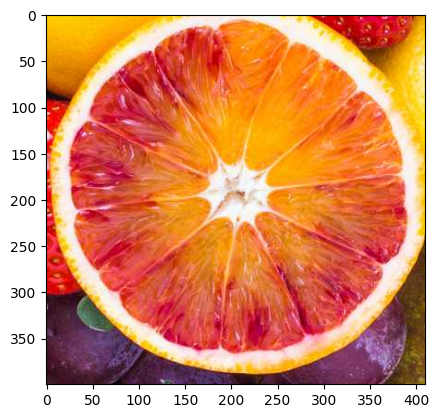

In [ ]:
#Cau 1
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')
bmg = data[800:1200, 570:980]
print(data.shape)

iio.imsave('orange.jpg', bmg)
plt.imshow(bmg)
plt.show()

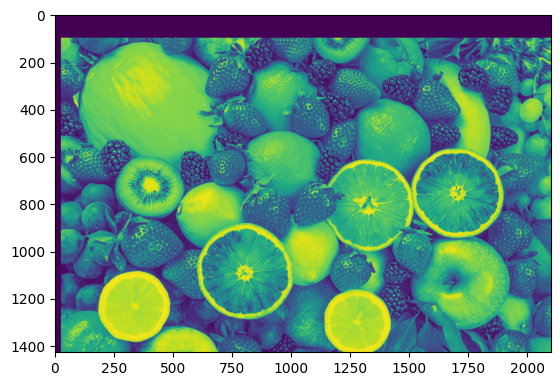

In [ ]:
#Cau 2
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg', mode='F')
bdata = nd.shift(data, (100, 25))

plt.imshow(bdata)
plt.show()

(1427, 2100, 3)
(2854, 4200, 6)
(2854, 4200, 3)


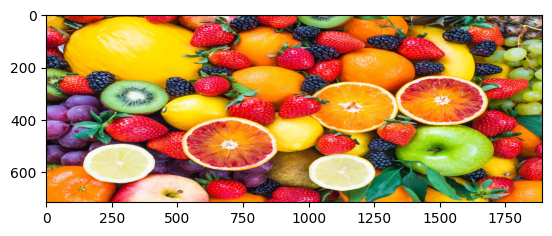

In [ ]:
#Cau 3
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')
print(data.shape)
bdata = nd.zoom(data, 2)
print(bdata.shape)
data2 = nd.zoom(data, (2, 2, 1))
print(data2.shape)
data3 = nd.zoom(data, (0.5, 0.9, 1))
plt.imshow(data3)
plt.show()

(1427, 2100, 3)


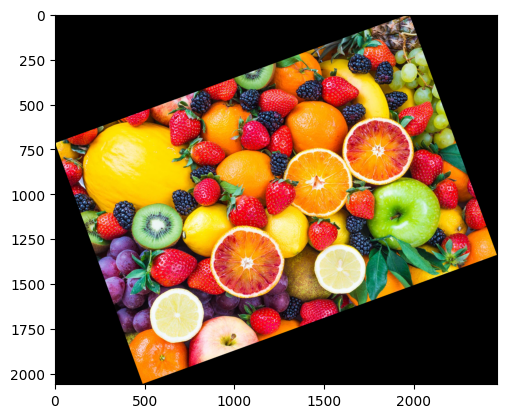

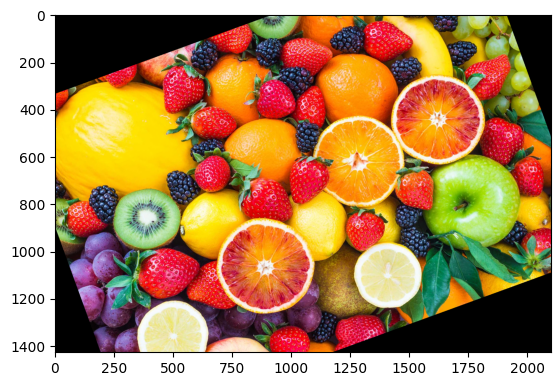

In [ ]:
#Cau 4
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')
print(data.shape)

d1 = nd.rotate(data, 20)
plt.imshow(d1)
plt.show()

d2 = nd.rotate(data, 20, reshape=False)
plt.imshow(d2)
plt.show()

(309, 515)


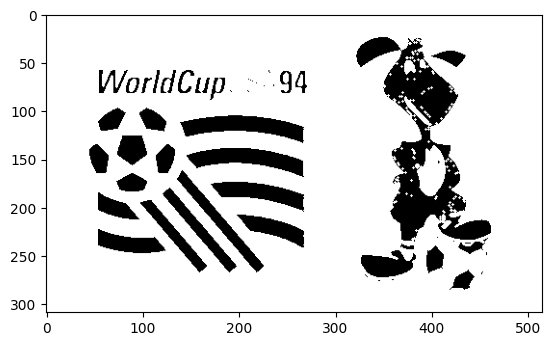

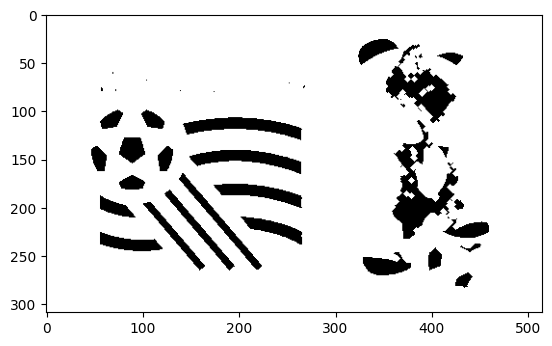

In [ ]:
#Cau 5
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('world_cup.jpg') 
data = np.mean(data, axis=2) > 128 
print(data.shape)

d1 = nd.binary_dilation(data)
plt.imshow(d1, cmap='gray')
plt.show()

d2 = nd.binary_dilation(data, iterations=3)
plt.imshow(d2, cmap='gray')
plt.show()

(309, 515)


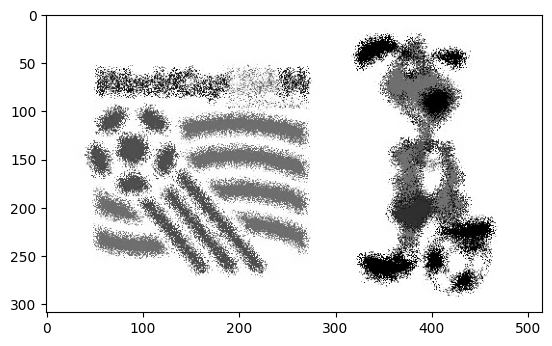

In [ ]:
#Cau 6
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt


data = iio.imread('world_cup.jpg')
data = np.mean(data, axis=2)
print(data.shape)
V, H = data.shape
M = np.indices((V, H))
d = 5
q = 2 * d * np.random.rand(*M.shape) - d
mp = (M + q).astype(int)
mp[0] = np.clip(mp[0], 0, V - 1)
mp[1] = np.clip(mp[1], 0, H - 1)
d1 = data[mp[0], mp[1]]
plt.imshow(d1, cmap='gray')
plt.show()

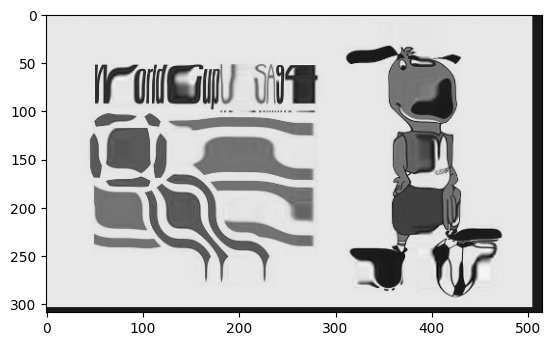

In [ ]:
#Cau 7
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt
def GeoFun(outcoord):
    a = 10 * np.cos(outcoord[0] / 10.0) + outcoord[0]
    b = 10 * np.cos(outcoord[1] / 10.0) + outcoord[1]
    return a, b
data = iio.imread('world_cup.jpg')
data = np.mean(data, axis=2)
d1 = nd.geometric_transform(data, GeoFun)
plt.imshow(d1, cmap='gray')
plt.show()

In [ ]:
#BAI TAP

In [ ]:
#Bai 1
from PIL import Image
import numpy as np
img = Image.open('kiwi.jpg')
arr = np.array(img)
h, w, c = arr.shape
new_h = h + 30
new_w = w + 50
new_arr = np.zeros((new_h, new_w, c), dtype=np.uint8)
for y in range(h):
    for x in range(w):
        new_arr[y + 30, x + 50] = arr[y, x]
import math
result = np.zeros_like(new_arr)
for y in range(new_h):
    shift = int(20 * math.sin(y / 20))
    for x in range(new_w):
        new_x = x + shift
        if 0 <= new_x < new_w:
            result[y, x] = new_arr[y, new_x]
Image.fromarray(result).save('kiwi_wave.jpg')

In [ ]:
#Bai 2
from PIL import Image
import numpy as np

papaya = Image.open("dudu.jpg").convert("RGBA")
watermelon = Image.open("duahau.jpg").convert("RGBA")
papaya_arr = np.array(papaya)
watermelon_arr = np.array(watermelon)
h1 = papaya_arr.shape[0]
for y in range(h1):
    red = int(255 * (1 - y / h1))
    green = int(255 * (y / h1))
    for x in range(papaya_arr.shape[1]):
        if papaya_arr[y, x, 3] > 0:
            papaya_arr[y, x, 0] = red      
            papaya_arr[y, x, 1] = green    
            papaya_arr[y, x, 2] = 0        
h2 = watermelon_arr.shape[0]
for y in range(h2):
    red = int(255 * (1 - y / h2) + 128 * (y / h2))
    green = int(255 * (1 - y / h2))
    blue = int(255 * (y / h2))
    for x in range(watermelon_arr.shape[1]):
        if watermelon_arr[y, x, 3] > 0:
            watermelon_arr[y, x, 0] = red
            watermelon_arr[y, x, 1] = green
            watermelon_arr[y, x, 2] = blue
papaya_img = Image.fromarray(papaya_arr)
watermelon_img = Image.fromarray(watermelon_arr)
canvas_w = papaya_img.width + watermelon_img.width
canvas_h = max(papaya_img.height, watermelon_img.height)
canvas = Image.new("RGBA", (canvas_w, canvas_h), (0, 0, 0, 0))
canvas.paste(papaya_img, (0, 0), papaya_img)
canvas.paste(watermelon_img, (papaya_img.width, 0), watermelon_img)
canvas.save("ket_qua.png")

In [ ]:
#Bai 3
from PIL import Image, ImageOps
mountain = Image.open("nui.jpg")
boat = Image.open("thuyen.jpg")
mountain_rotated = mountain.rotate(45, expand=False)
boat_rotated = boat.rotate(45, expand=False)
mountain_mirror = ImageOps.flip(mountain_rotated)
boat_mirror = ImageOps.flip(boat_rotated)
canvas_width = mountain_mirror.width + boat_mirror.width
canvas_height = max(mountain_mirror.height, boat_mirror.height)
canvas = Image.new("RGB", (canvas_width, canvas_height), "white")
canvas.paste(mountain_mirror, (0, 0))
canvas.paste(boat_mirror, (mountain_mirror.width, 0))
canvas.save("mountain_boat_mirror.jpg")

In [ ]:
#Bai 4
from PIL import Image
import numpy as np
img = Image.open("chua.jpg")
img = img.resize((img.width * 5, img.height * 5))
arr = np.array(img)
h, w, c = arr.shape
result = np.zeros_like(arr)
for y in range(h):
    shift = int(50 * np.sin(2 * np.pi * y / h))
    for x in range(w):
        new_x = x + shift
        if 0 <= new_x < w:
            result[y, x] = arr[y, new_x]
Image.fromarray(result).save("pagoda_warped.jpg")
